## Исследование данных о российском кинопрокате



### Описание проекта

Заказчик этого исследования — Министерство культуры Российской Федерации.
 
Нужно изучить рынок российского кинопроката и выявить текущие тренды. Отдельно необходимо исследовать фильмы, которые получили государственную поддержку, в частности, ответить на вопрос, насколько такие фильмы интересны зрителю.

Источник информации - данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Данные предоставлены за 2010 - 2019 годы.



### Шаг 1. Импорт данных
#### Импорт данных из файлов

Сохраняем данные из исходных файлов во временных переменных `dataset_1` и `dataset_2`. Предварительно оценим информацию в получившихся таблицах. 

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
dataset_1 = pd.read_csv('/datasets/mkrf_movies.csv')
dataset_2 = pd.read_csv('/datasets/mkrf_shows.csv')
display(dataset_1.head())
display(dataset_2.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [2]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [3]:
dataset_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


#### Объединение датасетов

Объединяем данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм. Объединение будем производить по столбцу `puNumber`, однако в `dataset_1` он имеет тип `object`, а в `dataset_2` тип `int`. Нужно сделать так, чтоб тип совпадал. Лучше конвертировать значения колонки из `dataset_1` в `int`, однако это сходу не получилось: там есть строковые значения. Поэтому изменим тип значений колонки из `dataset_2` на `object` и затем объединим два датасета в один датасет `data`, с которым и будем работать:

In [4]:
pd.to_numeric(dataset_1['puNumber'], errors='coerce')
print(dataset_1['puNumber'].sort_values().unique())
print(dataset_1.info())

[' 111004112' '111000110' '111000111' ... '231001012' '231001111' 'нет']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB
None


In [5]:
dataset_2['puNumber'] = dataset_2['puNumber'].astype('str')
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null object
box_office    3158 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [6]:
data = dataset_1.merge(dataset_2, on='puNumber', how='left') 
display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


#### Датасет для дальнейшей работы

Получившийся датасет `data` содержит информацию о фильмах. У одного фильма может быть несколько прокатных удостоверений. 

`title` — название фильма; 

`puNumber` — номер прокатного удостоверения; 

`show_start_date` — дата премьеры фильма; 

`type` — тип фильма; 

`film_studio` — студия-производитель; 

`production_country` — страна-производитель; 

`director` — режиссёр; 

`producer` — продюсер; 

`age_restriction` — возрастная категория; 

`refundable_support` — объём возвратных средств государственной поддержки; 

`nonrefundable_support` — объём невозвратных средств государственной поддержки; 

`financing_source` — источник государственного финансирования; 

`budget` — общий бюджет фильма (включая возвратную и невозвратную господдержку); 

`ratings` — рейтинг фильма на КиноПоиске; 

`genres` — жанр фильма;

`box_office` - кассовые сборы фильма.

Все колонки, кроме последней, вошли в результирующий датасет из `dataset_1`, последняя - из `dataset_2`.


### Шаг 2. Предобработка данных

#### Проверка типов данных

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

Проверим, что все колонки из `dataset_1` вошли в `data`. Кроме того, проверим общие характериктики получившегося датасета:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


Переименуем колонку `puNumber` в `pu_number`:

In [8]:
data = data.rename(columns={'puNumber': 'pu_number'})
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')

Имеет смысл изменить тип колонки `ratings` на `float`, чтоб можно было в дальнейшем обрабатывать значения как числа. Также стоит изменить тип колонки `show_start_date` на `datetime`.

Заменим значения в процентах на значения в виде XXX из 10 в колонке 'ratings', чтоб можно было изменить тип данных на `float`:

In [9]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [10]:
def replacer(rating):
    if '%' in str(rating):
        new_rating = int(rating[:-1])/10
    else: 
        new_rating = rating
    return new_rating

# data.query('ratings.notnull() and ratings.str.contains("%")', engine='python')['ratings'] = data.query('ratings.notnull() and ratings.str.contains("%")', engine='python')['ratings'].apply(replacer)
data['ratings'] = data['ratings'].apply(replacer)
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 9.9, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', 2.8, '3.7', '1.4', '3.1', 9.7, '3.5',
       '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4', '1.1', '3.6', 8.3,
       6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, '1.0', 8.9, '1.3', '1.9',
       '1.8', '1.2', '1.7', '9.0', 9.8, '8.9', '9.1'], dtype=object)

In [11]:
data.query('ratings.str.contains("%", na=False)').count()

title                    0
pu_number                0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Заменим типы колонок `ratings`, `show_start_date` на новые, проверим, что данные изменились.

In [12]:
data['ratings'] = data['ratings'].astype('float')
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y.%m.%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
pu_number                7486 non-null object
show_start_date          7486 non-null datetime64[ns, UTC]
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: datetime64[ns, UTC](1), float64(5), object(10)
memory usage: 994.2+ KB


#### Обработка пропусков в датафрейме

Исследуем пропуски в данных и заполним их там, где это возможно.

#####  Сводные данные
Посмотрим процент отсутствующих данных по датасету. В колонке `ratings` не хватает 12.92% данных, в колонке `genres` - 13.04%, в колонке `producer` - 7.59%, в колонке `director` - 0.12%, в колонке `production_country` - 0.03%, в колонке `film_studio` - 0.24%.

In [13]:
100*data.isna().mean()

title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
film_studio              0.24
production_country       0.03
director                 0.12
producer                 7.59
age_restriction          0.00
refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source        95.57
ratings                 12.92
genres                  13.04
box_office              57.81
dtype: float64

Данные о возвратной и невозвратной господдержке, общем бюджете фильма и источнике финансирования отсутствуют у 95,57% фильмов - то есть у большинства фильмов. Это означает, что большая часть фильмов, вошедших в датасет, выпущена без господдержки. Данные о кассовых сборах отсутствуют у 57.81% фильмов.




Проверим, у какого количества фильмов с данными о господдержке есть также информация о кассовых сборах. Информации о кассовых сборах нет у 4% фильмов, для которых известны данные о господдержке и бюджете. Эти данные являются ключевыми для исследования фильмов, выпущенных при господдержке, заполнять их расчетными нельзя (по-моему).

In [14]:
print(len(data)) # всего строк в датасете
print(len(data[data['box_office'].isna() == False])) # всего строк, где есть данные о кассовых сборах
print(len(data[(data['refundable_support'].isna() == False) 
               & (data['nonrefundable_support'].isna() == False) 
               & (data['budget'].isna() == False)]))
# всего строк, где есть данные о возвратной и невозвратной господдержке и общем бюджете фильма
print(len(data[(data['box_office'].isna() == False) 
               & (data['refundable_support'].isna() == False) 
               & (data['nonrefundable_support'].isna() == False) 
               & (data['budget'].isna() == False)]))
# всего строк, где есть данные о кассовых сборах, возвратной и невозвратной господдержке и общем бюджете фильма

7486
3158
332
318


In [15]:
round(318 / 332 * 100)

96

##### Заполнение пропусков в `producer`, `director`, `production_country`, `film_studio`, `genres`, `financing_source`

Для удобства работы пропуски в колонках `producer`, `director`, `production_country`, `film_studio`, `genres` заменим на "Неизвестно", т.к. заполнить эти значения расчетными невозможно (кроме страны производства, которую можно определеить по студии фильма, но это не нужно для исследования).

In [16]:
data['producer'] = data['producer'].fillna("Неизвестно")
data['director'] = data['director'].fillna("Неизвестно")
data['film_studio'] = data['film_studio'].fillna("Неизвестно")
data['production_country'] = data['production_country'].fillna("Неизвестно")
data['genres'] = data['genres'].fillna("Неизвестно")
data['financing_source'] = data['financing_source'].fillna("Неизвестно")
100*data.isna().mean()

title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
film_studio              0.00
production_country       0.00
director                 0.00
producer                 0.00
age_restriction          0.00
refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source         0.00
ratings                 12.92
genres                   0.00
box_office              57.81
dtype: float64

##### Заполнение пропусков в `ratings`

Пропуски в `ratings` заполним расчетными значениями. Было бы логично рассчитать значения по жанру, студии и директору. Однако у фильмов с отсутствующими рейтингами также неизвестны жанры; у большинства нет также информации по студии и директору. Зато для всех строк известен тип фильма. Поэтому где можно рассчитаем значения по студии и директору, а где нельзя - по типу фильма. Произведем замену.

In [17]:
100 * data[data['ratings'].isna() == True].isna().mean()

title                     0.00
pu_number                 0.00
show_start_date           0.00
type                      0.00
film_studio               0.00
production_country        0.00
director                  0.00
producer                  0.00
age_restriction           0.00
refundable_support       98.35
nonrefundable_support    98.35
budget                   98.35
financing_source          0.00
ratings                 100.00
genres                    0.00
box_office               74.77
dtype: float64

In [18]:
print(len(data[data['ratings'].isna() == True]))
print(len(data[(data['ratings'].isna() == True) 
              & (data['film_studio'] != "Неизвестно")
              & (data['director'] != "Неизвестно")
              & (data['genres'] != "Неизвестно")]))
print(len(data[(data['ratings'].isna() == True) 
              & (data['film_studio'] != "Неизвестно")
              & (data['director'] != "Неизвестно")]))


967
0
948


In [19]:
groups = data.groupby(['film_studio', 'director'])['ratings'].transform('median')
data['ratings'] = data['ratings'].fillna(groups)
100*data.isna().mean()

title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
film_studio              0.00
production_country       0.00
director                 0.00
producer                 0.00
age_restriction          0.00
refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source         0.00
ratings                 11.42
genres                   0.00
box_office              57.81
dtype: float64

In [20]:
groups = data.groupby(['type'])['ratings'].transform('median')
data['ratings'] = data['ratings'].fillna(groups)
100*data.isna().mean()

title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
film_studio              0.00
production_country       0.00
director                 0.00
producer                 0.00
age_restriction          0.00
refundable_support      95.57
nonrefundable_support   95.57
budget                  95.57
financing_source         0.00
ratings                  0.00
genres                   0.00
box_office              57.81
dtype: float64

#### Проверка наличия дубликатов
Проверим данные на наличие дубликатов. Явных дубликатов в данных нет:


In [21]:
data.duplicated().sum()

0

#### Проверка категориальных значений
Проверим категориальные значения в датасете. В столбце `type` есть неявные дубликаты значений, появившиеся из-за лишнего пробела. Уберем их.

In [22]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [23]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Также неявные дубликаты значений могут появиться из-за регистра записей. Напишем функцию, которая конвертнет все значения в `lowercase`. Затем обрежем все лишние пробелы в значениях колонок `title`, `film_studio`, `production_country`, `genres`, `financing_source` и конвертируем их в `lowercase`. Это даст нам возможность проверить, что неявных дубликатов, вызванных этими причинами, тоже нет.

In [24]:
def lowercase(value):
    new_value = value.lower()
    return new_value

data['type'] = data['type'].apply(lowercase)

In [25]:
data['title'] = data['title'].apply(lowercase).str.strip()
data['film_studio'] = data['film_studio'].apply(lowercase).str.strip()
data['production_country'] = data['production_country'].apply(lowercase).str.strip()
data['genres'] = data['genres'].apply(lowercase).str.strip()
data['financing_source'] = data['financing_source'].apply(lowercase).str.strip()

In [26]:
data.duplicated().sum()

0

#### Проверка количественных значений

Проверим столбцы с количественными данными на подозрительные значения. Для этого выведем основные метрики по столбцам. Убирать NaN значения не буду, чтоб увидеть распределение данных во всех строках.

In [27]:
print(data['refundable_support'].describe())
print(data['nonrefundable_support'].describe())
print(data['budget'].describe())
print(data['box_office'].describe())

count           332.00
mean     11,864,457.83
std      24,916,555.26
min               0.00
25%               0.00
50%               0.00
75%      15,000,000.00
max     180,000,000.00
Name: refundable_support, dtype: float64
count           332.00
mean     48,980,988.89
std      59,980,117.92
min               0.00
25%      25,000,000.00
50%      30,000,000.00
75%      40,375,000.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64
count             332.00
mean      127,229,716.68
std       188,588,333.12
min                 0.00
25%        42,000,000.00
50%        68,649,916.00
75%       141,985,319.50
max     2,305,074,303.00
Name: budget, dtype: float64
count           3,158.00
mean       76,478,696.16
std       240,353,122.82
min                 0.00
25%            86,239.00
50%         2,327,987.55
75%        23,979,671.02
max     3,073,568,690.79
Name: box_office, dtype: float64


In [28]:
print(data['refundable_support'].mean())
print(data['refundable_support'].sum() / len(data))
print(data['refundable_support'].sum() / data['refundable_support'].count())
# проверили, что mean() считается только по существующим значениям, как и все метрики.

11864457.831325302
526182.2067860005
11864457.831325302


В описании данных видим подозрительное значение стандартного отклонения (240,353,122.82) для колонки 'budget': оно в сто с лишним раз превышает медиану (2,327,987.55). Значит, в данных есть огромных выброс в районе максимума. Построим ящик с усами, чтоб убедиться в этом. Так и есть: одно значение (максимум) сильно выбивается из выборки.

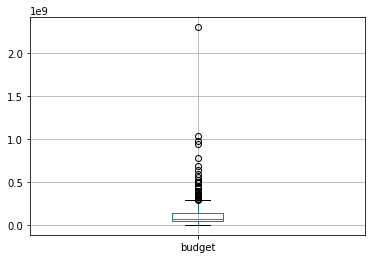

In [29]:
import matplotlib as plt
data.boxplot(column='budget')

Не стоит угадывать его, эту строку я удаляю. Замена прошла успешно, стандартное отклонение стало больше медианы в 2.12 раз, что более реалистично. График тоже изменился.

count             331.00
mean      120,650,125.79
std       145,798,364.17
min                 0.00
25%        42,000,000.00
50%        68,490,606.00
75%       140,015,119.00
max     1,032,905,957.00
Name: budget, dtype: float64


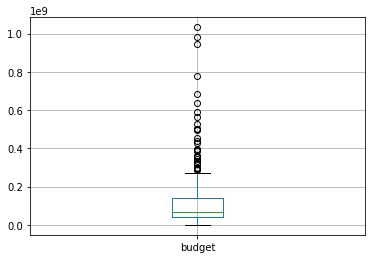

In [30]:
data.drop(data.index[data['budget'] == data['budget'].max()], inplace=True)
print(data['budget'].describe())
data.boxplot(column='budget')

Проверим строки, где значения `budget` заполнены и равны нулю. 

In [31]:
data[(data['budget'] == 0) 
     & (data['budget'].isna() == False) 
     & ((data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0))].count() 
# действительно есть строки с заполненными данными, где бюджет нулевой, при этом объемы господдержки больше нуля

title                    17
pu_number                17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  17
genres                   17
box_office               17
dtype: int64

Оказывается, бюджет равен нулю, в то время как `refundable_support` или `nonrefundable_support` больше нуля. Так быть не может. Бюджет не может быть меньше суммы этих колонок. Заменим нули на сумму этих колонок.

In [32]:
data.query('budget == 0 and budget.isna() == False').sort_values(by='budget').loc[:, ['budget', 'refundable_support', 'nonrefundable_support']]

,budget,refundable_support,nonrefundable_support
2053,0.00,0.00,"23,000,000.00"
6008,0.00,"40,000,000.00","40,000,000.00"
5806,0.00,"10,000,000.00","60,000,000.00"
5673,0.00,"20,000,000.00","40,000,000.00"
3739,0.00,"25,000,000.00","20,000,000.00"
3675,0.00,"20,000,000.00","20,000,000.00"
3565,0.00,0.00,"250,000,000.00"
6323,0.00,0.00,"138,969,465.00"
3047,0.00,"19,000,000.00","51,000,000.00"
2788,0.00,0.00,"35,000,000.00"


In [33]:
len(data[data['budget'] == 0])

17

In [34]:
def replacer(budget, refundable_support, nonrefundable_support):
    if budget < (refundable_support + nonrefundable_support):
        new_budget = refundable_support + nonrefundable_support
    else:
        new_budget = budget
    return new_budget

data['new_budget'] = data.apply(
    lambda row: replacer(row['budget'], row['refundable_support'], row['nonrefundable_support']), axis=1)
data['budget'] = data['new_budget']
data = data.drop('new_budget', axis=1)

In [35]:
100*data.isna().mean()

title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
film_studio              0.00
production_country       0.00
director                 0.00
producer                 0.00
age_restriction          0.00
refundable_support      95.58
nonrefundable_support   95.58
budget                  95.58
financing_source         0.00
ratings                  0.00
genres                   0.00
box_office              57.82
dtype: float64

In [36]:
data['budget'].describe() # данные по бюджету очищены от ошибок

count             331.00
mean      124,855,471.60
std       144,117,597.24
min         6,000,000.00
25%        45,510,944.00
50%        70,876,172.00
75%       149,292,611.00
max     1,032,905,957.00
Name: budget, dtype: float64

#### Добавление новых столбцов





##### Добавление столбца с информацией о годе проката 

Создадим столбец с информацией о годе проката. 

In [37]:
data['show_start_year'] = data['show_start_date'].dt.year

##### Добавление столбцов с ФИО главного режиссёра и основным жанром фильма
<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Добавим в датасет столбцы с ФИО главного режиссера и основным жанром фильма. Столбцы можно добавить с помощью функции. Для этого можно написать функцию `first_element()` или воспользоваться `lambda()`.

In [38]:
def first_element(line):
    first_el = line.split(',')[0]
    return first_el

In [39]:
data['main_director'] = data['director'].apply(lambda director: director.split(',')[0])
print(data.query('director != main_director').loc[:, ['director', 'main_director']].head())
# проверили, что замена прошла успешно

                          director     main_director
19       В.Краснопольский, В.Усков  В.Краснопольский
51  Иоахим Реннинг, Эспен Сандберг    Иоахим Реннинг
58      Дрю Дэйуолт, Дэвид Шнейдер       Дрю Дэйуолт
60       Айрон Блейз, Роберт Уокер       Айрон Блейз
71   И.Пырьев, М.Ульянов, К.Лавров          И.Пырьев


Чтобы написанная функция не пропала даром, воспользуюсь ей во втором случае:

In [40]:
data['main_genre'] = data['genres'].apply(first_element)
print(data.query('main_genre != genres').loc[:, ['main_genre', 'genres']].head())

   main_genre                     genres
0      боевик     боевик,драма,мелодрама
1       драма              драма,военный
2  фантастика  фантастика,боевик,триллер
3  фантастика  фантастика,боевик,триллер
4  фантастика  фантастика,боевик,триллер


##### Добавление столбца с долей господдержки в бюджете фильма

Добавим колонку с долей господдержки в бюджете фильма. Воспользуемся для этого `lambda`. Проверим, что замена прошла успешно.

In [41]:
data['support_share'] = data.apply(lambda row: round(
    (row['refundable_support'] + row['nonrefundable_support']) / row['budget'], 2
                                  ), axis=1)

print(data.query('support_share > 0').loc[:, ['refundable_support', 'nonrefundable_support', 'budget', 'support_share']].head())

      refundable_support  nonrefundable_support         budget  support_share
1281                0.00          26,500,000.00  79,411,900.00           0.33
1448                0.00          26,000,000.00  37,142,857.00           0.70
1498                0.00         107,847,945.00 176,023,490.00           0.61
1524                0.00          28,000,000.00  40,574,140.00           0.69
1792                0.00          25,000,000.00  40,015,122.00           0.62


##### Вывод

Данные проверены на возможные ошибки, пропуски в данных заполнены. Получившийся датасет содержит 7485 строк, 20 колонок. Датасет готов к использованию для исследовательского анализа данных.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 20 columns):
title                    7485 non-null object
pu_number                7485 non-null object
show_start_date          7485 non-null datetime64[ns, UTC]
type                     7485 non-null object
film_studio              7485 non-null object
production_country       7485 non-null object
director                 7485 non-null object
producer                 7485 non-null object
age_restriction          7485 non-null object
refundable_support       331 non-null float64
nonrefundable_support    331 non-null float64
budget                   331 non-null float64
financing_source         7485 non-null object
ratings                  7485 non-null float64
genres                   7485 non-null object
box_office               3157 non-null float64
show_start_year          7485 non-null int64
main_director            7485 non-null object
main_genre               7485 non-null object
suppo

### Анализ фильмов в российском кинопрокате


#### Анализ проката фильмов по годам

##### Количество фильмов в год
За период с 2010 по 2019 год в российский прокат вышел 6761 фильм.

В 2010 году в прокат вышло 818 фильмов.  В 2011 - 2017 годы количество упало, минимум был в 2017 году (505 фильмов, и это особенно интересно, учитывая, что 2017 год показал высокие суммарные кассовые сборы - чуть меньше, чем в наиболее успешном 2018 году). В 2018 году число фильмов в прокате (883 фильма), впервые превысило значение 2010 года. Рост продолжился в 2019 году, когда вышел максимум фильмов (924 фильма). 

В целом, динамику можно охарактеризовать так: локальный максимум в 2010, резкий обвал в 2011 году (557 фильмов), дальше постепенный рост до 2019 года с провалом на 2017 году. Можно ожидать, что количество фильмов в прокате и дальше будет расти.

In [43]:
len(data['title'].unique())

6761

Количество уникальных фильмов в год:

In [44]:
data.groupby('show_start_year').title.nunique()

show_start_year
2010    818
2011    557
2012    556
2013    615
2014    766
2015    688
2016    782
2017    505
2018    883
2019    924
Name: title, dtype: int64

Поскольку в датасете одному фильму может соответствовать несколько строк (по количеству прокатных удостоверений), построим график на датасете, очищенном от дубликатов. Для некоторых фильмах строки с разными прокатными удостоверениями имеют разный год выхода в прокат. Пренебрежем этим.

In [45]:
custom = data.loc[:, ['title', 'show_start_year']].drop_duplicates()
print(custom.count())

title              7094
show_start_year    7094
dtype: int64


In [46]:
data['title'].drop_duplicates().count()

6761

Text(0, 0.5, 'Количество фильмов')

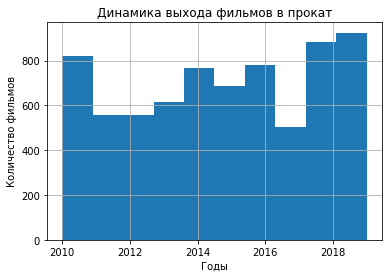

In [47]:
ax = custom['show_start_year'].hist()
ax.set_title('Динамика выхода фильмов в прокат')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество фильмов')

##### Динамика кассовых сборов по годам
##### Динамика проката по годам c учетом информации о кассовых сборах 
Посмотрим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Данные о прокате в кинотеатрах (кассовые сборы, колонка box_office) известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Информация о кассовых сборах есть для 42% фильмов.

In [48]:
print(round(data['box_office'].isna().mean(), 2)) # нет данных
print(round(len(data[data['box_office'].isna() == False]) / len(data), 2)) # есть данные

0.58
0.42


Построим графики динамики кассовых сборов. Количество фильмов, для которых известны кассовые сборы, растет с 2010 года. К 2014 году это значение выросло примерно в 2.7 раз по сравнению с 2010 годом, а кассовые сборы выросли в 3065.5 раз. Причина неочевидна. Возможно это эффект нулевой начальной базы, возможно, повышение уровня жизни, возможно, сказалось что-то еще. Во всяком случае, это не связано с ростом среднего и медианного рейтинга фильмов, вышедших в прокат.

Одновременно с суммарными сборами в 2014 году на несколько порядков выросли медианное и среднее значения кассовых сборов. Для медианного резкий рост (на два порядка) продолжился в 2015 году.

                      median           mean               sum  count
show_start_year                                                     
2010                1,700.00      23,000.00      2,428,654.00    105
2011                3,000.00     130,000.00     14,102,765.00    109
2012                5,660.00      54,000.00      6,955,423.00    128
2013                3,522.50     160,000.00     29,799,706.20    184
2014               18,160.00  27,000,000.00  7,444,951,859.20    279
2015            4,920,933.00  85,000,000.00 39,497,365,196.40    465
2016            3,846,679.41  91,000,000.00 47,866,299,741.91    526
2017            9,968,340.00 140,000,000.00 48,563,707,217.51    357
2018            8,891,102.21 100,000,000.00 49,668,403,134.32    475
2019            4,601,033.60  91,000,000.00 48,092,111,720.00    529


Text(0, 0.5, 'Количество фильмов')

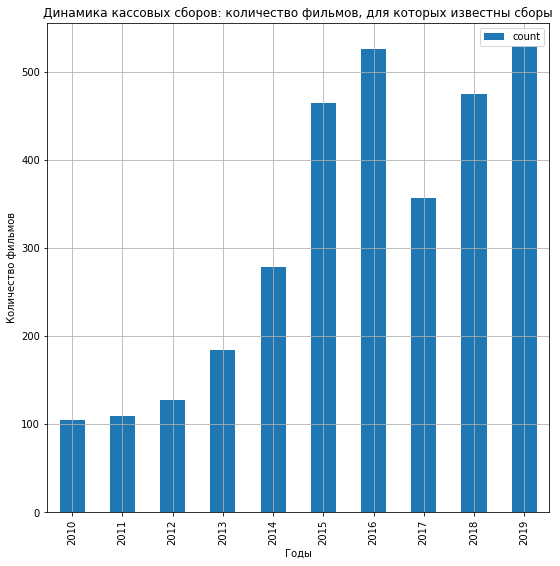

In [49]:
custom_set = data.groupby('show_start_year')['box_office'].agg(['median', lambda x: '{:.2} '.format(x.mean()), 'sum', 'count'])
custom_set = custom_set.rename(columns={'<lambda_0>': 'mean'})
print(custom_set)

ax = custom_set.plot(kind='bar', y='count', figsize=(9, 9), grid=True)
ax.set_title('Динамика кассовых сборов: количество фильмов, для которых известны сборы')
ax.set_xlabel('Годы')
ax.set_ylabel('Количество фильмов')

Rectangle(xy=(-0.25, 0), width=0.5, height=2.42865e+06, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=1.41028e+07, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=6.95542e+06, angle=0)
Rectangle(xy=(2.75, 0), width=0.5, height=2.97997e+07, angle=0)
Rectangle(xy=(3.75, 0), width=0.5, height=7.44495e+09, angle=0)
Rectangle(xy=(4.75, 0), width=0.5, height=3.94974e+10, angle=0)
Rectangle(xy=(5.75, 0), width=0.5, height=4.78663e+10, angle=0)
Rectangle(xy=(6.75, 0), width=0.5, height=4.85637e+10, angle=0)
Rectangle(xy=(7.75, 0), width=0.5, height=4.96684e+10, angle=0)
Rectangle(xy=(8.75, 0), width=0.5, height=4.80921e+10, angle=0)


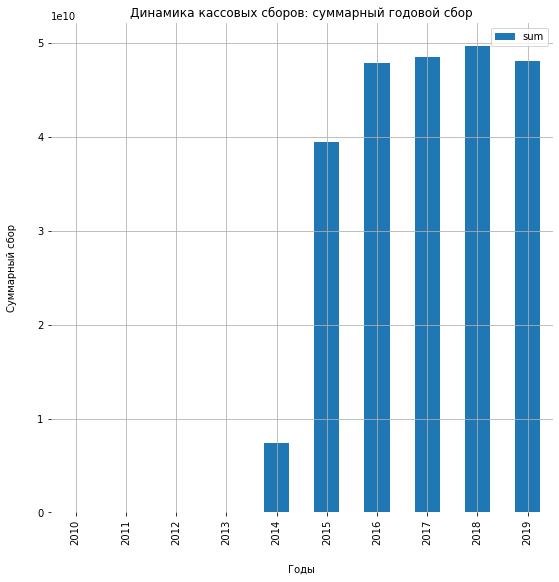

In [50]:
ax = custom_set.plot(kind='bar', y='sum', figsize=(9, 9), grid=True)
ax.set_title('Динамика кассовых сборов: суммарный годовой сбор')
ax.set_xlabel('Годы', labelpad=20)
ax.set_ylabel('Суммарный сбор',labelpad=20)

for p in ax.patches:
    print(p)
ax.set_frame_on(False)

Rectangle(xy=(-0.25, 0), width=0.5, height=2.42865e+06, angle=0)
Rectangle(xy=(0.75, 0), width=0.5, height=1.41028e+07, angle=0)
Rectangle(xy=(1.75, 0), width=0.5, height=6.95542e+06, angle=0)
Rectangle(xy=(2.75, 0), width=0.5, height=2.97997e+07, angle=0)
Rectangle(xy=(3.75, 0), width=0.5, height=7.44495e+09, angle=0)
Rectangle(xy=(4.75, 0), width=0.5, height=3.94974e+10, angle=0)
Rectangle(xy=(5.75, 0), width=0.5, height=4.78663e+10, angle=0)
Rectangle(xy=(6.75, 0), width=0.5, height=4.85637e+10, angle=0)
Rectangle(xy=(7.75, 0), width=0.5, height=4.96684e+10, angle=0)
Rectangle(xy=(8.75, 0), width=0.5, height=4.80921e+10, angle=0)


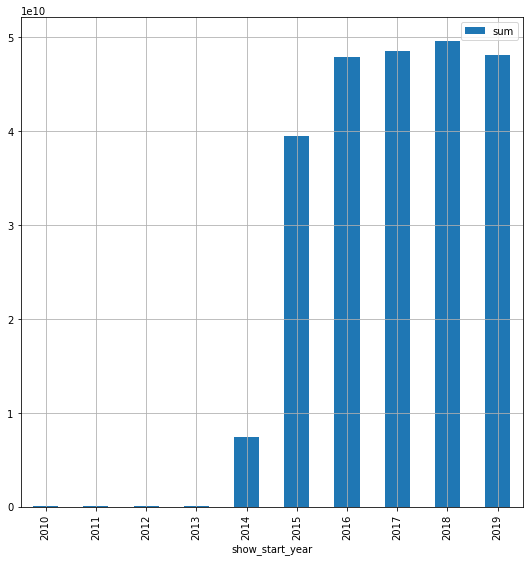

In [51]:
ax = custom_set.plot(kind='bar', y='sum', figsize=(9, 9), grid=True)
for p in ax.patches:
    print(p)

In [52]:
# Количество фильмов, для которых известны кассовые сборы, выросло в 2.66 раза
print(round(data.query('show_start_year == 2014')['box_office'].count() / 
            data.query('show_start_year == 2010')['box_office'].count(), 2))
# А кассовые сборы выросли в 3065.5 раз
print(round(data.query('show_start_year == 2014')['box_office'].sum() / 
            data.query('show_start_year == 2010')['box_office'].sum(), 2))

2.66
3065.46


Доля фильмов, для которых неизвестны кассовые сборы, в целом имеет тенденцию к снижению, хотя в 2018 - 2019 годах снова растет:

In [53]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
for year in years:
    print(data.query('show_start_year == @year')['box_office'].isna().mean())
    


0.8934010152284264
0.8247588424437299
0.7841483979763912
0.707936507936508
0.654275092936803
0.3404255319148936
0.3569682151589242
0.29306930693069305
0.4668911335578002
0.43057050592034446


Рост кассовых сборов не связан с тем, что фильмы стали лучше: рейтинги падают.

In [54]:
data.groupby('show_start_year')['ratings'].agg(['median', lambda x: '{:.2} '.format(x.mean())])

,median,<lambda_0>
show_start_year,,
2010,6.80,6.70
2011,6.70,6.60
2012,6.70,6.60
2013,6.60,6.50
2014,6.60,6.50
2015,6.50,6.40
2016,6.50,6.30
2017,6.40,6.30
2018,6.40,6.40


Text(0, 0.5, 'Годовая медиана, руб.')

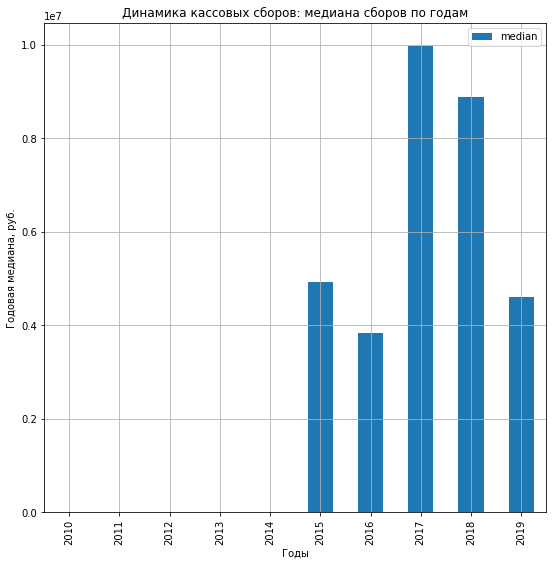

In [55]:
ax = custom_set.plot(kind='bar', y='median', figsize=(9, 9), grid=True)
ax.set_title('Динамика кассовых сборов: медиана сборов по годам')
ax.set_xlabel('Годы')
ax.set_ylabel('Годовая медиана, руб.')

Text(0, 0.5, 'Средний кассовый сбор, руб.')

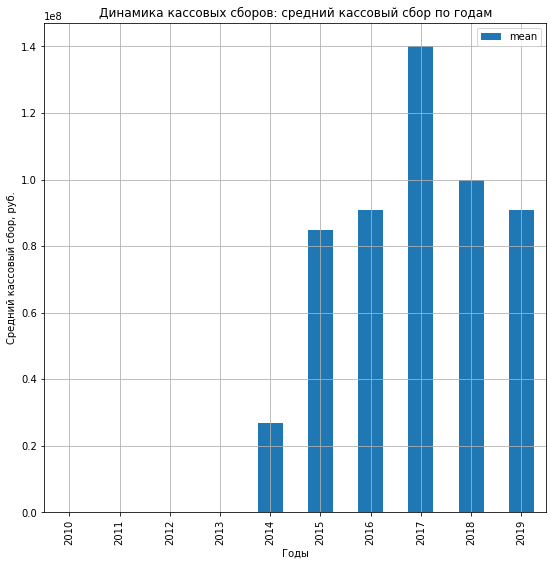

In [56]:
ax = custom_set.plot(kind='bar', y='mean', figsize=(9, 9), grid=True)
ax.set_title('Динамика кассовых сборов: средний кассовый сбор по годам')
ax.set_xlabel('Годы')
ax.set_ylabel('Средний кассовый сбор, руб.')

Для сравнения посмотрим разбивку фильмов по годам без учета наличия данных о кассовых сборах и долю фильмов с указанными данными о прокате по годам. Общее количество фильмов в прокате выросло незначительно. Однако доля фильмов с указанными кассовыми сборами выросла. 

Можно предположить, что рост кассовых сборов по годам обусловлен тем, что в таблице за года, начиная с 2015 значительно больше фильмов с указанной информацией о кассовых сборах (данных за 2015 год примерно в два раза больше, чем за 2013). С другой стороны, можно предположить, что выросли сборы с одного фильма. В данные за 2014 год могло попасть несколько фильмов в большими кассовыми сборам, что вызвало сильный рост среднего и не такой сильный рост медианы.

In [57]:
data.groupby('show_start_year')['title'].agg('count') 

show_start_year
2010    985
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    929
Name: title, dtype: int64

show_start_year
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

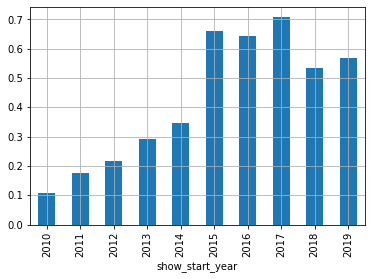

In [58]:
custom_set_2 = data.groupby('show_start_year')['box_office'].agg('count') / data.groupby('show_start_year')['title'].agg('count') 
display(custom_set_2)
custom_set_2.plot(kind='bar', x='show_start_year', grid=True)

###### C помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года

   show_start_year           mean       median
0             2010      23,130.04     1,700.00
1             2011     129,383.17     3,000.00
2             2012      54,339.24     5,660.00
3             2013     161,954.92     3,522.50
4             2014  26,684,415.27    18,160.00
5             2015  84,940,570.31 4,920,933.00
6             2016  91,000,569.85 3,846,679.41
7             2017 136,032,793.33 9,968,340.00
8             2018 104,565,059.23 8,891,102.21
9             2019  90,911,364.31 4,601,033.60
Index(['show_start_year', 'mean', 'median'], dtype='object')


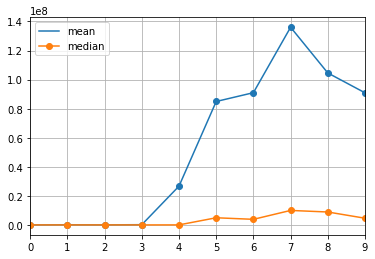

In [59]:
custom_set_3 = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean', 'median'])
custom_set_3 = custom_set_3.stack().reset_index().drop('level_1', axis=1)
print(custom_set_3)
print(custom_set_3.columns)
custom_set_3.loc[:, 'mean'].plot(x='show_start_date', style='o-', grid=True, legend=True)
custom_set_3.loc[:, 'median'].plot(x='show_start_date', style='o-', grid=True, legend=True)

##### Влияние возрастного ограничения на сборы

Попробуем выявить взаимосвязь возрастного ограничения аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Попробуем выявить закономерности и предположить, с чем они могут быть связаны.

Больше всего в российском прокате фильмов категории "16+" (2851 прокатное удостоверение за 10 лет). Меньше всего детских фильмов "0+" и "6+", их суммарное количество (881 и 625 прокатных удостоверений) меньше, чем в любой другой категории. При этом медианные сборы с фильмов "6+" выше, чем в любой другой категории. Вторая по медианным сборам категория - "18+".

Суммарные сборы максимальны по категории "16+" (76_583_674_041 рублей), что обусловлено количеством фильмов в прокате. Следом за ней идет категория "12+". Для сравнения, сборы по категории "6+" (57_197_131_795 рублей) составляют 3/4 этой суммы. Минимальны суммарные сборы по категории "0+" - возможно, дети, которым эти фильмы или мультфильмы интересны, в кинотеатры не попадают (медианные сборы по этой категории также минимальны).

Анализ динамики за 2015 - 2019 годы показывает следующее. В 2017 году был максимальный медианный сбор с одного фильма по всем категориям (кроме "12+", но и для нее это локальный пик. Вероятно, это связано с выходом хороших фильмов. В категории "0+" и "6+" - вероятно, в это были фильмы "Движение вверх", "Ёлки новые". Мультфильмы: , "Гадкий я", "Босс-молокосос", "Монстры на каникулах", "Гринч", "Зверопой", "Три богатыря и принцесса Египта", "Фиксики", "Тачки-3", "Ральф против интернета", "Суперсемейка-2". 

Самый высокий показатель медианных сборов в группе "12+" приходится на 2015 год. Скорей всего, это вышли "Звездные войны: пробуждение силы". 

Самые высокие кассовые сборы в российском кинопрокате показал фильм "Холоп" (2019, Россия).

В целом, в российском прокате лучше всего окупаются фильмы категории "6+". Макимальные суммарные кассовые сборы в категориях "12+" и "16+". Предположительно, причина в том, что в кино наиболее охотно ходят дети подростки.

Фильмы по категориям в прокате:

age_restriction
«0+» - для любой зрительской аудитории     811
«12+» - для детей старше 12 лет           1593
«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«6+» - для детей старше 6 лет              625
Name: title, dtype: int64


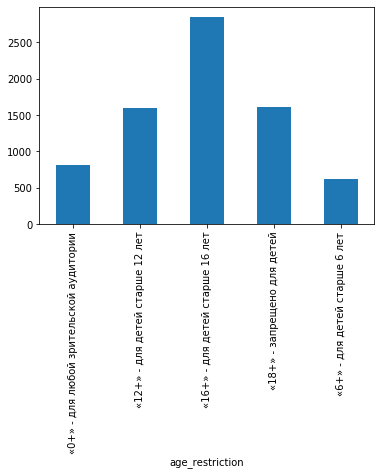

In [60]:
print(data.groupby('age_restriction')['title'].agg('count'))
data.groupby('age_restriction')['title'].agg('count').plot(
    kind='bar', x='age_restriction', y='title')

Суммарные кассовые сборы по категориям:

age_restriction
«0+» - для любой зрительской аудитории    1,205,003,951.67
«12+» - для детей старше 12 лет          63,225,588,059.83
«16+» - для детей старше 16 лет          76,583,674,040.93
«18+» - запрещено для детей              42,974,727,569.62
«6+» - для детей старше 6 лет            57,197,131,795.49
Name: box_office, dtype: float64


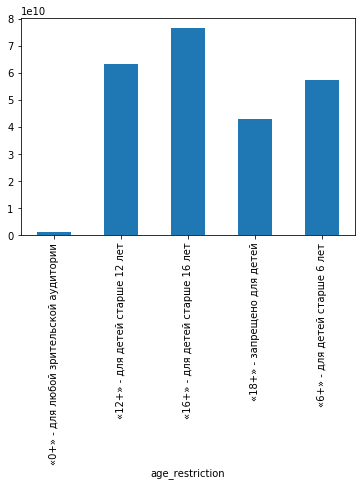

In [61]:
print(data.groupby('age_restriction')['box_office'].agg('sum'))
data.groupby('age_restriction')['box_office'].agg('sum').plot(
    kind='bar', x='age_restriction', y='box_office')

Медианные кассовые сборы по категориям:

age_restriction
«0+» - для любой зрительской аудитории      79,090.00
«12+» - для детей старше 12 лет            710,627.01
«16+» - для детей старше 16 лет          1,744,835.00
«18+» - запрещено для детей              5,107,818.36
«6+» - для детей старше 6 лет            5,807,856.00
Name: box_office, dtype: float64


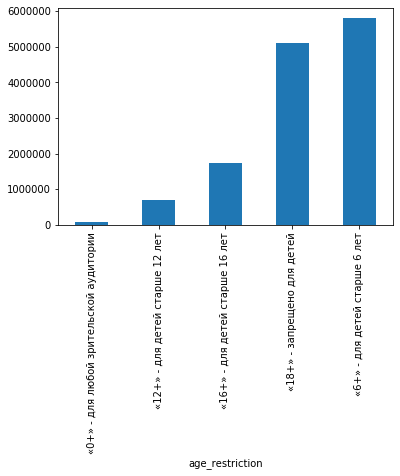

In [62]:
print(data.groupby('age_restriction')['box_office'].agg('median'))
data.groupby('age_restriction')['box_office'].agg('median').plot(
    kind='bar', x='age_restriction', y='box_office')

Динамика по годам:

In [63]:
custom_set_4 = data.query(
    'show_start_year in [2015, 2016, 2017, 2018, 2019]'
     ).groupby(['show_start_year', 'age_restriction'])['box_office'].agg('median')

# print(custom_set_4)
# print(custom_set_4.index)
custom_set_4 = custom_set_4.reset_index()
print(custom_set_4)
print(custom_set_4.index) # this is Series, so no columns

    show_start_year                         age_restriction    box_office
0              2015  «0+» - для любой зрительской аудитории  2,943,318.70
1              2015         «12+» - для детей старше 12 лет 15,351,562.50
2              2015         «16+» - для детей старше 16 лет  4,676,819.40
3              2015             «18+» - запрещено для детей  4,616,614.70
4              2015           «6+» - для детей старше 6 лет 20,380,982.20
5              2016  «0+» - для любой зрительской аудитории  2,571,294.10
6              2016         «12+» - для детей старше 12 лет  4,690,635.25
7              2016         «16+» - для детей старше 16 лет  5,133,021.74
8              2016             «18+» - запрещено для детей  6,107,001.74
9              2016           «6+» - для детей старше 6 лет  3,026,256.15
10             2017  «0+» - для любой зрительской аудитории 22,178,956.00
11             2017         «12+» - для детей старше 12 лет  9,010,548.00
12             2017         «16+» - дл

Медианные сборы фильмов разных возрастных категорий в каждом из годов:

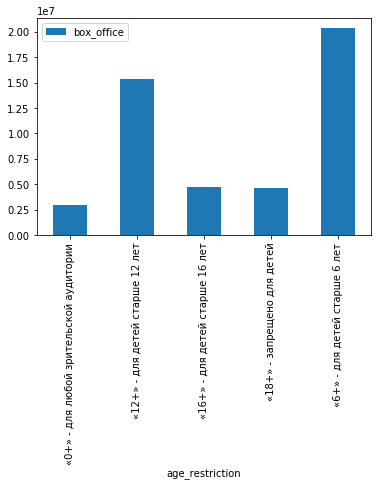

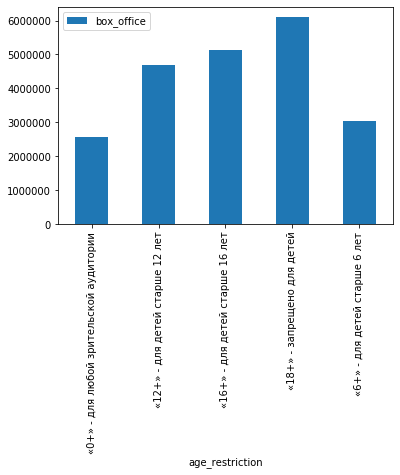

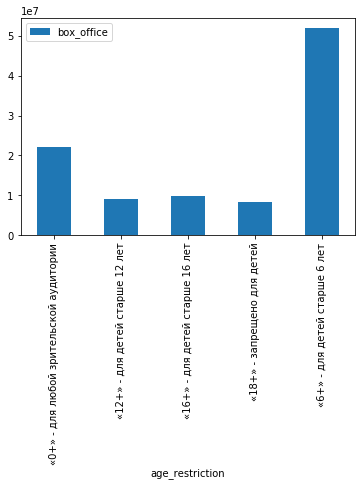

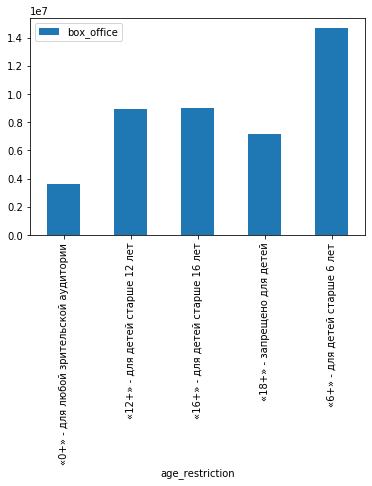

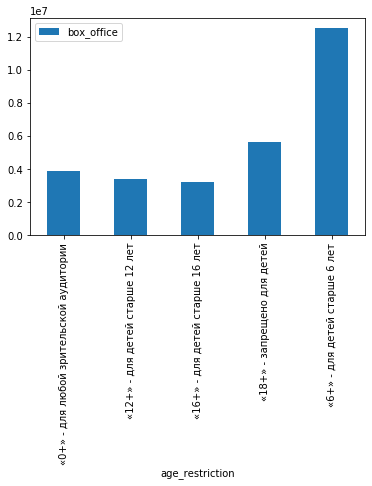

In [64]:
years = [2015, 2016, 2017, 2018, 2019]

for year in years:
    year_set = custom_set_4.query('show_start_year == @year')
    #print(year_set)
    ax = year_set.plot(kind='bar', x='age_restriction', y='box_office')
    ax.set_title = year # не отобразился
   

Динамика медианных кассовых сборов по годам для каждой возрастной категории:

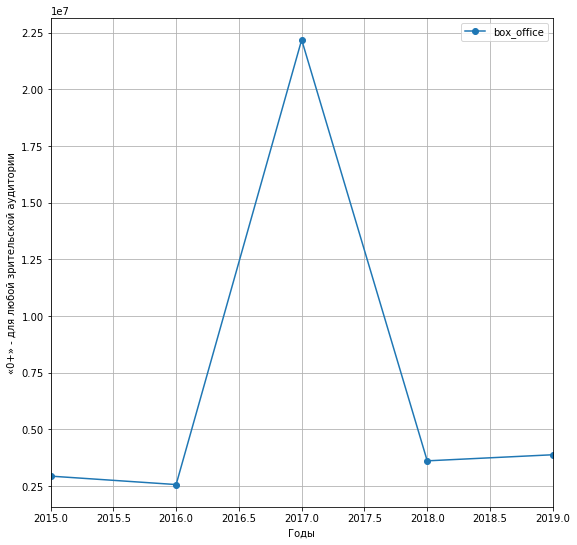

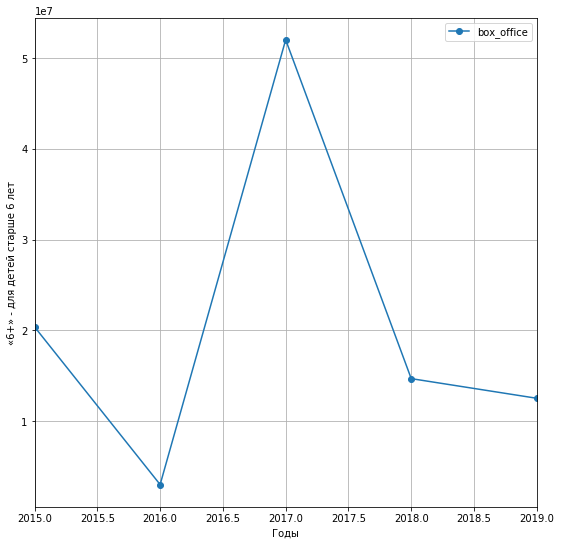

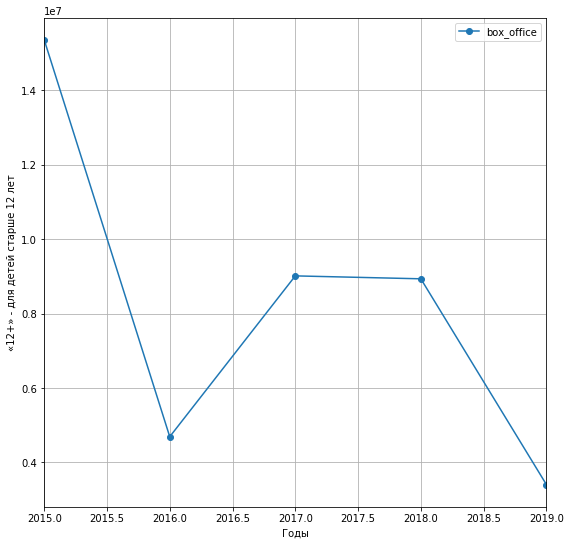

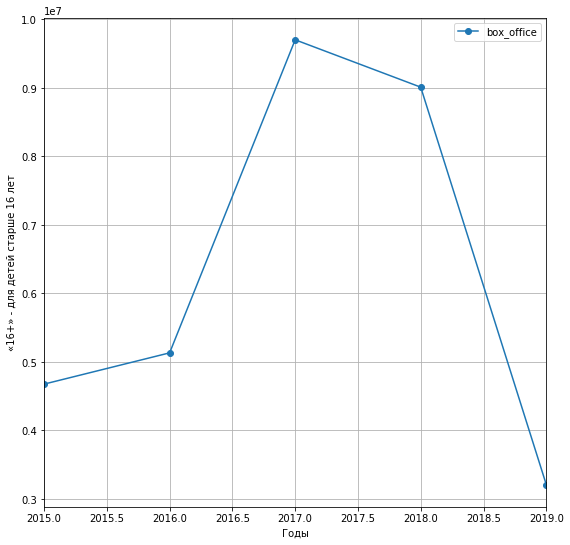

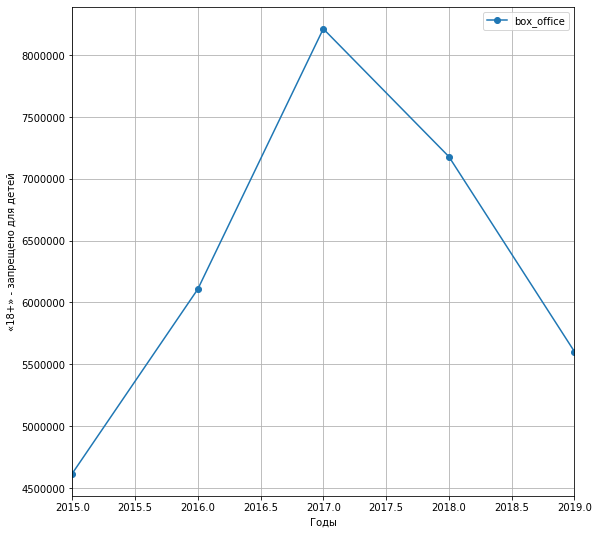

In [65]:
age_restrictions = ['«0+» - для любой зрительской аудитории', 
                   '«6+» - для детей старше 6 лет',
                   '«12+» - для детей старше 12 лет',
                   '«16+» - для детей старше 16 лет',
                   '«18+» - запрещено для детей']

for restriction in age_restrictions:
    restriction_set = custom_set_4.query('age_restriction == @restriction')
    #print(restriction_set)
    ax = restriction_set.loc[:, ['show_start_year', 'box_office']].plot(x='show_start_year', style='o-', label=restriction, figsize=(9, 9), grid=True, legend=True)
    ax.set_xlabel('Годы')
    ax.set_ylabel(restriction)


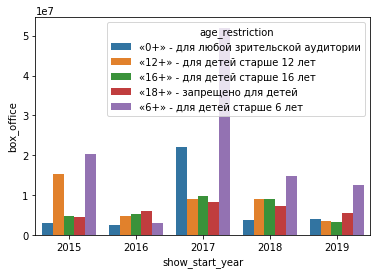

In [66]:
# Код ревьюера

import seaborn as sns

sns.barplot(data=custom_set_4, x='show_start_year',y='box_office',hue='age_restriction')

Посмотрим, выход каких фильмов определил кассовые сборы:

In [67]:
restrictions = ['«0+» - для любой зрительской аудитории', '«6+» - для детей старше 6 лет']
print(data.query(
    'show_start_year in [2017, 2018] and age_restriction in @restrictions'
    ).sort_values(by='box_office', ascending=False).loc[:, ['title', 'box_office']].head(10))

                                   title       box_office
5653                      движение вверх 2,779,686,144.00
3742                          гадкий я 3 1,390,392,637.00
3235                      босс-молокосос 1,376,726,723.00
6016  монстры на каникулах 3: море зовёт 1,125,242,943.91
6526                               гринч   988,639,946.66
3637                            зверопой   886,614,109.00
5641                          ёлки новые   855,451,052.00
5944                суперсемейка 2 / бао   853,370,310.26
5659     три богатыря и принцесса египта   759,226,773.00
6435              ральф против интернета   739,485,125.85


In [68]:
print(data.query(
    'show_start_year == 2015 and age_restriction == "«12+» - для детей старше 12 лет"'
    ).sort_values(by='box_office', ascending=False).loc[:, ['title', 'box_office']].head(10))


                                 title       box_office
3117  звёздные войны: пробуждение силы 1,658,861,425.50
2159            мстители: эра альтрона 1,500,989,281.90
2579               мир юрского периода 1,211,158,990.00
2509               терминатор: генезис 1,060,054,283.00
2599                    эверест (2015)   630,550,647.80
2623                   человек-муравей   587,487,039.90
2401                восхождение юпитер   581,522,463.10
2616                    агенты а.н.к.л   573,332,918.40
2721                разлом сан-андреас   535,810,483.90
1915     дивергент, глава 2: инсургент   490,175,572.40


In [69]:
data.loc[:'title']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genre,support_share
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,неизвестно,7.20,"боевик,драма,мелодрама",nan,2015,Кевин Костнер,боевик,nan
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,Е.Матвеев,Неизвестно,«6+» - для детей старше 6 лет,nan,nan,nan,неизвестно,6.60,"драма,военный",nan,2016,Е.Матвеев,драма,nan
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,неизвестно,6.80,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика,nan
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,неизвестно,6.80,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика,nan
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,неизвестно,6.80,"фантастика,боевик,триллер",nan,2015,Тимур Бекмамбетов,фантастика,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,сад художника: американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,прочие,севен артс продакшнз,великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,nan,nan,nan,неизвестно,7.20,неизвестно,nan,2019,Фил Грабски,неизвестно,nan
7482,звериная ярость,121037819,2019-12-24 12:00:00+00:00,художественный,"дэниел гродник продакшнз, вандерфилм медиа кор...",сша,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,nan,nan,nan,неизвестно,5.40,"боевик,триллер",nan,2019,Ник Пауэлл,боевик,nan
7483,щенячий патруль: скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,художественный,"никелодеон анимейшн студиос, спин мастер",сша - канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,nan,nan,nan,неизвестно,6.40,неизвестно,nan,2019,Чарльз Е.Бастьен,неизвестно,nan
7484,"машины песенки. серия ""испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,анимационный,"анимаккорд лтд., ооо студия ""анимаккорд""","республика кипр, россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,nan,nan,nan,неизвестно,6.40,неизвестно,nan,2019,А.Беляев,неизвестно,nan


Наиболее кассовые фильмы по годам:

In [70]:
pop_films = []
for year in years:
    year_max = data.query('show_start_year == @year')['box_office'].max()
    pop_films.append(data.query(
        'show_start_year == @year and box_office == @year_max').loc[:,['show_start_year', 'title', 'age_restriction']])
    
display(pop_films)   

[      show_start_year                             title  \
 3117             2015  звёздные войны: пробуждение силы   
 
                       age_restriction  
 3117  «12+» - для детей старше 12 лет  ,
       show_start_year       title                age_restriction
 2859             2016  зверополис  «6+» - для детей старше 6 лет,
       show_start_year           title                age_restriction
 5653             2017  движение вверх  «6+» - для детей старше 6 лет,
       show_start_year title                  age_restriction
 6549             2018  т-34  «12+» - для детей старше 12 лет,
       show_start_year  title                  age_restriction
 7456             2019  холоп  «12+» - для детей старше 12 лет]

In [71]:
def stats(group):
    mask = (group['box_office'] == group['box_office'].max())
    
    return group[mask][['title','age_restriction']].head(1).squeeze()

data.groupby('show_start_year').apply(stats)

,title,age_restriction
show_start_year,,
2010,морские динозавры 3d: путешествие в доисториче...,«0+» - для любой зрительской аудитории
2011,черные дыры: обратная сторона вселенной,«0+» - для любой зрительской аудитории
2012,мстители_,«16+» - для детей старше 16 лет
2013,невидимки,«12+» - для детей старше 12 лет
2014,седьмой сын,«12+» - для детей старше 12 лет
2015,звёздные войны: пробуждение силы,«12+» - для детей старше 12 лет
2016,зверополис,«6+» - для детей старше 6 лет
2017,движение вверх,«6+» - для детей старше 6 лет
2018,т-34,«12+» - для детей старше 12 лет


Фильм с максимальными кассовыми сборами за 10 лет:

In [72]:
data.query(
        'show_start_year == @year and box_office == box_office.max()'
).loc[:,['show_start_year', 'title', 'age_restriction', 'production_country', 
         'refundable_support', 'nonrefundable_support']]

,show_start_year,title,age_restriction,production_country,refundable_support,nonrefundable_support
7456,2019,холоп,«12+» - для детей старше 12 лет,россия,"25,000,000.00","35,000,000.00"


##### Вывод
###### Динамика количества фильмов в прокате
За период с 2010 по 2019 год в российский прокат вышел 6761 фильм.

В 2010 году в прокат вышло 818 фильмов.  В 2011 - 2017 годы количество упало, минимум был в 2017 году (505 фильмов, и это особенно интересно, учитывая, что 2017 год показал высокие суммарные кассовые сборы - чуть меньше, чем в наиболее успешном 2018 году - и максимальные медианные сборы с одного фильма). В 2018 году число фильмов в прокате (883 фильма), впервые превысило значение 2010 года. Рост продолжился в 2019 году, когда вышел максимум фильмов (924 фильма). 

В целом, динамику можно охарактеризовать так: локальный максимум в 2010, резкий обвал в 2011 году (557 фильмов), дальше постепенный рост до 2019 года с провалом на 2017 году. Можно ожидать, что количество фильмов в прокате и дальше будет расти.

###### Динамика кассовых сборов
Количество фильмов, для которых известны кассовые сборы, растет с 2010 года. К 2014 году это значение выросло примерно в 2.7 раз по сравнению с 2010 годом, а кассовые сборы выросли в 3065.5 раз. Причина неочевидна. Возможно это эффект нулевой начальной базы, возможно, повышение уровня жизни, возможно, сказалось что-то еще. Во всяком случае, это не связано с ростом среднего и медианного рейтинга фильмов, вышедших в прокат.

Также можно предположить, что рост кассовых сборов по годам обусловлен тем, что в таблице за года, начиная с 2015 значительно больше фильмов с указанной информацией о кассовых сборах (данных за 2015 год примерно в два раза больше, чем за 2013), но это не объясняет роста сборов на несколько порядков. Также можно предположить, что выросли сборы с одного фильма.

Одновременно с суммарными сборами в 2014 году на несколько порядков выросли медианное и среднее значения кассовых сборов. Для медианного резкий рост (на два порядка) продолжился в 2015 году.

В 2017 году вырос медианный сбор с одного фильма по всем возрастным категориям. За счет этого суммарные сборы были почти такими же, как в 2018 году, несмотря на то, что фильмов в прокат вышло значительно (на 42%) меньше. Этот год был наиболее успешным.

###### Влияние возрастных ограничений фильмов на кассовые сборы
Фильмы в российском прокате разделены по возрастным категориям: "0+", "6+", "12+", "16+", "18+", которые влияют на кассовые сборы.

Больше всего в российском прокате фильмов категории "16+" (2851 прокатное удостоверение за 10 лет). Меньше всего детских фильмов "0+" и "6+", их суммарное количество (881 и 625 прокатных удостоверений) меньше, чем в любой другой категории. При этом медианные сборы с фильмов "6+" выше, чем в любой другой категории. Вторая по медианным сборам категория - "18+".

Суммарные сборы максимальны по категории "16+" (76_583_674_041 рублей), что обусловлено количеством фильмов в прокате. Следом за ней идет категория "12+". Для сравнения, сборы по категории "6+" (57_197_131_795 рублей) составляют 3/4 этой суммы. Минимальны суммарные сборы по категории "0+" - возможно, дети, которым эти фильмы или мультфильмы интересны, в кинотеатры не попадают (медианные сборы по этой категории также минимальны).

Анализ динамики за 2015 - 2019 годы показывает следующее. В 2017 году был максимальный медианный сбор с одного фильма по всем категориям (кроме "12+", но и для нее это локальный пик. Вероятно, это связано с выходом хороших фильмов. В категории "0+" и "6+" - вероятно, в это были фильмы "Движение вверх", "Ёлки новые". Мультфильмы: , "Гадкий я", "Босс-молокосос", "Монстры на каникулах", "Гринч", "Зверопой", "Три богатыря и принцесса Египта", "Фиксики", "Тачки-3", "Ральф против интернета", "Суперсемейка-2". 

Самый высокий показатель медианных сборов в группе "12+" приходится на 2015 год. Скорей всего, это вышли "Звездные войны: пробуждение силы". 

Самые высокие кассовые сборы в российском кинопрокате показал фильм "Холоп" (2019, Россия). Фильм был субсидирован Минкультом.

В целом, в российском прокате лучше всего окупаются фильмы категории "6+". Макимальные суммарные кассовые сборы в категориях "12+" и "16+". Предположительно, причина в том, что в кино наиболее охотно ходят дети подростки.

### Шаг 4. Анализ фильмов, которые получили государственную поддержку
#### Датасет для исследования фильмов, получивших господдержку

В основном датасете `data`, с которым работали до этого, данных о господдержке и бюджете фильма нет для большинства фильмов. Зато если у фильма есть данные о господдержке, то они есть об обоих ее видах и о бюджете. У 14 фильмов из 331 отсутствуют данные о кассовых сборах, это 4.23% выборки. Исключим эти строки. Можно было бы заполнить значения медианными, но это может исказить результаты.

Сформируем новый датасет `supported_films`, чтоб изучить фильмы, получившие господдержку. В нем оставим только те строки, в которых есть данные о возвратной и невозвратной господдержке, бюджете и кассовых сборах фильма. В получившемся датасете 317 строк, отсутствующих значений нет.

In [73]:
data[data.isna() == False].count()

title                    7485
pu_number                7485
show_start_date          7485
type                     7485
film_studio              7485
production_country       7485
director                 7485
producer                 7485
age_restriction          7485
refundable_support        331
nonrefundable_support     331
budget                    331
financing_source         7485
ratings                  7485
genres                   7485
box_office               3157
show_start_year          7485
main_director            7485
main_genre               7485
support_share             331
dtype: int64

In [74]:
data[(data['budget'].isna() == False) 
     & (data['refundable_support'].isna() == False) 
     & (data['nonrefundable_support'].isna() == False)].count() 

title                    331
pu_number                331
show_start_date          331
type                     331
film_studio              331
production_country       331
director                 331
producer                 331
age_restriction          331
refundable_support       331
nonrefundable_support    331
budget                   331
financing_source         331
ratings                  331
genres                   331
box_office               317
show_start_year          331
main_director            331
main_genre               331
support_share            331
dtype: int64

In [75]:
supported_films = data.query(
    'refundable_support.isna() == False \
    and nonrefundable_support.isna() == False \
    and budget.isna() == False \
    and box_office.isna() == False')
100 * supported_films.isna().mean()

title                   0.00
pu_number               0.00
show_start_date         0.00
type                    0.00
film_studio             0.00
production_country      0.00
director                0.00
producer                0.00
age_restriction         0.00
refundable_support      0.00
nonrefundable_support   0.00
budget                  0.00
financing_source        0.00
ratings                 0.00
genres                  0.00
box_office              0.00
show_start_year         0.00
main_director           0.00
main_genre              0.00
support_share           0.00
dtype: float64

В исходном датасете одному фильму могло соответствовать несколько прокатных номеров. При изучении датасета по фильмам, получившим господдержку, такое дублирование было бы плохой практикой: один фильм рассматривался бы как два. Однако в этом датасете одному фильму соответствует только одно удостоверение. Поэтому дополнительно преобразовывать датасет не нужно.

In [76]:
print(len(supported_films['title'].unique()))
print(len(supported_films['pu_number'].unique()))

317
317


#### Какие фильмы получают господдержку?

Проанализируем, какие фильмы получают господдержку. 

##### Страна производства

Как и следовало ожидать, Минкульт субсидирует фильмы российского производства или, реже, совместного производства.


In [77]:
supported_films.groupby('production_country')['title'].count()

production_country
россия                                        304
россия, армения                                 1
россия, германия                                2
россия, германия, великобритания                1
россия, германия, казахстан, польша, китай      1
россия, италия                                  2
россия, латвия, чешская республика              1
россия, сербия                                  1
россия, украина, польша                         1
россия, франция, латвия                         1
россия-словакия-чехия                           1
россия-украина                                  1
Name: title, dtype: int64

##### Возрастные категории и жанры

В основном поддержку получают фильмы для подростков: категории "12+" и "16+", на них в совокупности приходится около 2/3 выданных субсидий. Порядка 20% составляют фильмы категории "6+". Сравнительно высокая доля субсидий на фильмы "6+", возможно, связана со стремлением развить кино для младшешкольников: таких фильмов в российском прокате явно не хватает.

Чаще других субсидии получают драмы, комедии и мультфильмы. 

Самым популярным жанром оказались подростковые драмы (68 фильмов из 317 с рейтингами "12+" и "16+"). На втором месте - подростковые комедии (62 фильма из 317 с рейтингами "12+" и "16+"). На третьем месте идут мультфильмы с рейтингом "6+" (26 фильмов).

В наиболее популярной категории подростковой драмы много патриотических, военных и исторических фильмов ("Т-34", "А зори здесь тихие...", "Тренер", "Крым", "Донбасс. Окраина", "Батальонъ"). Однако топ по бюджетам в этой категории - фильм "Грех" (про Микелианджело) и "Дуэлянт" (приключенческий фильм про русское дворянство и дуэли).

In [78]:
supported_films.groupby('age_restriction')['title'].count()

age_restriction
«0+» - для любой зрительской аудитории      5
«12+» - для детей старше 12 лет           100
«16+» - для детей старше 16 лет           120
«18+» - запрещено для детей                28
«6+» - для детей старше 6 лет              64
Name: title, dtype: int64

In [79]:
supported_films.groupby('main_genre')['title'].count().sort_values(ascending=False)

main_genre
драма          87
комедия        73
мультфильм     30
неизвестно     15
триллер        15
мелодрама      14
фэнтези        11
фантастика     10
ужасы          10
военный         9
семейный        6
боевик          6
приключения     5
детектив        5
мюзикл          4
история         4
криминал        3
спорт           3
детский         3
биография       3
реальное тв     1
Name: title, dtype: int64

In [80]:
display(supported_films.groupby(['main_genre', 'age_restriction'])['title'].count().sort_values(ascending=False).head(15))

main_genre  age_restriction                
драма       «16+» - для детей старше 16 лет    49
комедия     «12+» - для детей старше 12 лет    33
            «16+» - для детей старше 16 лет    29
мультфильм  «6+» - для детей старше 6 лет      26
драма       «12+» - для детей старше 12 лет    19
            «18+» - запрещено для детей        14
триллер     «16+» - для детей старше 16 лет    10
ужасы       «16+» - для детей старше 16 лет     8
военный     «12+» - для детей старше 12 лет     7
комедия     «6+» - для детей старше 6 лет       7
неизвестно  «12+» - для детей старше 12 лет     7
фантастика  «12+» - для детей старше 12 лет     6
мелодрама   «12+» - для детей старше 12 лет     6
            «16+» - для детей старше 16 лет     6
фэнтези     «16+» - для детей старше 16 лет     5
Name: title, dtype: int64

In [81]:
restrictions = ['«12+» - для детей старше 12 лет', '«16+» - для детей старше 16 лет']
display(supported_films.query(
    'age_restriction in @restrictions and main_genre == "драма"'
).sort_values(by='budget', ascending=False)['title'].head(30))


7171                           грех
3351                        дуэлянт
6549                           т-34
5502                        салют-7
2092                      батальонъ
3453                        ледокол
5826                         тренер
6846                       братство
6855                       миллиард
3321                    крым (2017)
1870         а зори здесь тихие..._
3481                землетрясение .
3686                          молот
3657              простая история .
6853             коридор бессмертия
2482                      однажды._
2771       милый ханс, дорогой петр
6587        в кейптаунском порту...
5842                         спитак
2534         конец прекрасной эпохи
6922               донбасс. окраина
2580    под электрическими облаками
6252                       без меня
1871                    две женщины
6178                    непрощенный
2677               синдром петрушки
5663                 со дна вершины
1281                  пока е

##### Киностудии

На 317 фильмов субсидии выданы 239 студиям, это значит, что Минкульт поддерживает многие киностудии, не только топовые, но и малоизвестные. Чаще других субсидии получают студии ООО "Таббак", ООО "Студия анимационного кино "Мельница", ООО "Кинокомпания "СТВ", ООО "Визарт фильм", ООО "Продюсерский центр "Ленфильм", ООО "Каро продакшн", ООО "Артлайт", ООО "Энджой мувиз", ООО "Нон-стоп продакшн" и ООО "Магнум-фильм".

In [82]:
supported_films.groupby('film_studio')['title'].count().sort_values(ascending=False).head(10)

film_studio
ооо "таббак"                                 7
ооо "студия анимационного кино "мельница"    7
ооо "кинокомпания "ств"                      6
ооо "визарт фильм"                           5
ооо "продюсерский центр "ленфильм"           4
ооо "каро продакшн"                          4
ооо "артлайт"                                3
ооо "энджой мувиз"                           3
ооо "нон-стоп продакшн"                      3
ооо "магнум-фильм"                           3
Name: title, dtype: int64

In [83]:
len(supported_films['film_studio'].unique())

239

##### Режиссеры

Субсидии были выданы на фильмы 259 режиссеров, что указывает на поддержку разнообразия. Максимальное количество субсидий, полученных одним режиссером - пять штук, их получил Р.Давлетьяров. Чаще других субсидии получают Д. Дьяченко, С.Андреасян, А.Цицилин, А.Котт, Д.Шмидт, Н.Хомерики, С.Мокрицкий, К.Шипенко, А.Аксененко.

In [84]:
supported_films.groupby('main_director')['title'].count().sort_values(ascending=False).head(10)

main_director
Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
А.Цицилин        3
А.Котт           3
Д.Шмидт          3
Н.Хомерики       3
С.Мокрицкий      3
К.Шипенко        3
А.Аксененко      3
Name: title, dtype: int64

In [85]:
len(supported_films['main_director'].unique())

259

#### Динамика объемов господдержки
Посмотрим, как изменялись объемы государственной поддержки по годам. Для этого добавим в датасет колонку `total_support` в которую запишем суммарную господдержку, включающую возвратные и невозвратные средства. Сгруппируем данные по годам и выведем на графики основные метрики: количество фильмов, получивших господдержку, медиану дотации на один фильм, общую сумму дотаций за год.



In [86]:
supported_films['total_support'] = supported_films['refundable_support'] + supported_films['nonrefundable_support']
print(supported_films.columns)


Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office',
       'show_start_year', 'main_director', 'main_genre', 'support_share',
       'total_support'],
      dtype='object')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


                       median          mean              sum  count
show_start_year                                                    
2013            67,173,972.50 67,000,000.00   134,347,945.00      2
2014            27,500,000.00 36,000,000.00   572,002,299.00     16
2015            30,000,000.00 43,000,000.00 3,631,241,459.00     85
2016            35,000,000.00 72,000,000.00 4,291,635,482.00     60
2017            40,000,000.00 81,000,000.00 3,148,971,662.00     39
2018            45,000,000.00 62,000,000.00 3,446,969,465.00     56
2019            40,000,000.00 65,000,000.00 3,816,000,000.00     59


Text(0, 0.5, 'Фильмы, получившие господдержку')

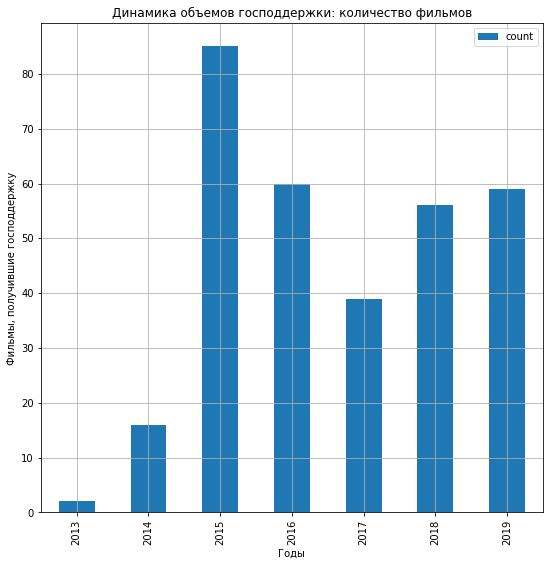

In [87]:
grouped_set = supported_films.groupby('show_start_year')['total_support'].agg(['median', lambda x: '{:.2} '.format(x.mean()), 'sum', 'count'])
grouped_set = grouped_set.rename(columns={'<lambda_0>': 'mean'})
print(grouped_set)

ax = grouped_set.plot(kind='bar', y='count', figsize=(9, 9), grid=True)
ax.set_title('Динамика объемов господдержки: количество фильмов')
ax.set_xlabel('Годы')
ax.set_ylabel('Фильмы, получившие господдержку')

Text(0, 0.5, 'Объемы господдержки')

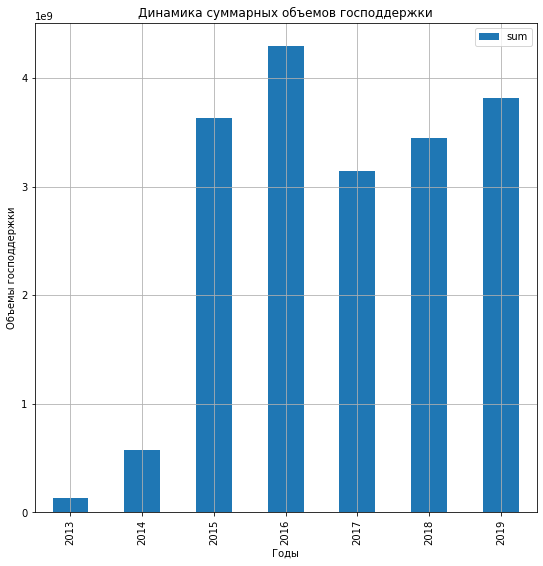

In [88]:
ax = grouped_set.plot(kind='bar', y='sum', figsize=(9, 9), grid=True)
ax.set_title('Динамика суммарных объемов господдержки')
ax.set_xlabel('Годы')
ax.set_ylabel('Объемы господдержки')

Text(0, 0.5, 'Медиана дотации на один фильм')

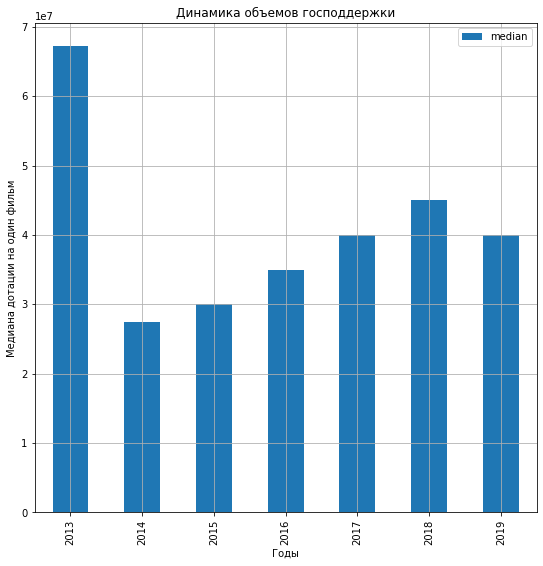

In [89]:
ax = grouped_set.plot(kind='bar', y='median', figsize=(9, 9), grid=True)
ax.set_title('Динамика объемов господдержки')
ax.set_xlabel('Годы')
ax.set_ylabel('Медиана дотации на один фильм')

Рассмотрим также, как изменялась доля господдержки в бюджетах фильмов по годам.

                 median  mean
show_start_year              
2013               0.47  0.47
2014               0.58  0.55
2015               0.62  0.56
2016               0.64  0.57
2017               0.52  0.51
2018               0.59  0.55
2019               0.56  0.51


Text(0, 0.5, 'Доля субсидий в бюджете (медиана)')

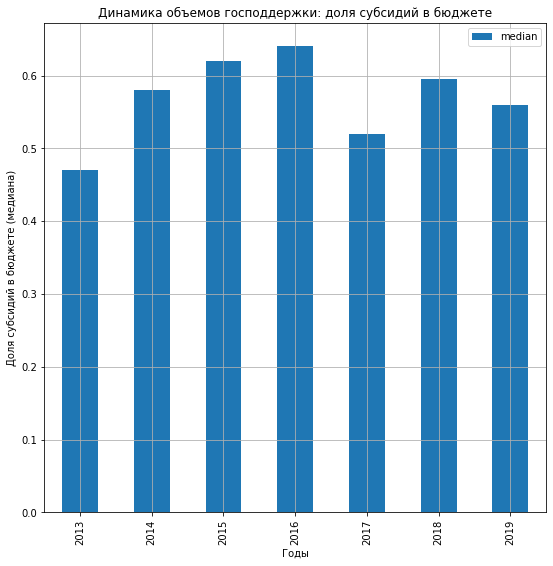

In [90]:
grouped_set = supported_films.groupby('show_start_year')['support_share'].agg(['median', lambda x: '{:.2} '.format(x.mean())])
grouped_set = grouped_set.rename(columns={'<lambda_0>': 'mean'})
print(grouped_set)

ax = grouped_set.plot(kind='bar', y='median', figsize=(9, 9), grid=True)
ax.set_title('Динамика объемов господдержки: доля субсидий в бюджете')
ax.set_xlabel('Годы')
ax.set_ylabel('Доля субсидий в бюджете (медиана)')

**Выводы**

Данных до 2013 года нет. В 2013 году количество фильмов, получивших субсидии, было минимальным, при этом медиана максимально высокая. Можно предположить, что в 2013 году субсидии были экспериментом, причем удачным: было субсидировано всего два фильма, но на очень крупные суммы. Учитывая, что субсидии не окупились, результат, видимо, понравился Минкульту по каким-то другим причинам. С 2013 года динамика господдержки (объемы, количество фильмов, медиана субсидии) имеет общую тенденцию к росту, несмотря на неравномерность показателей. Графики выглядят так, будто Минкульт ищет оптимальную стратегию субсидирования кинематографа, при наличии общей стратегии на субсидирование кинематографа. 

В 2014 году медиана субсидий падает, после этого равномерно растет вплоть до 2019 года включительно.
В 2014 году количество фильмов, получивших субсидию, растет, в 2015 достигает пика на фоне сравнительно низкой единичной субсидии (которая все же выше, чем в 2014 году). В 2016 году количество фильмов несколько снижается, зато медиана увеличивается и общая сумма субсидий достигает пика. 
В 2017 году поддержка временно сокращается: при растущей медиане падает количество фильмов и общий объем субсидий. После этого, начиная с 2017 и в 2018 - 2019 году, все показатели равномерно растут. 

Медианная доля субсидий в бюджете фильмов колеблется в пределах 47 - 64%. Самой низкой после "пробного" 2013 года она была в наиболее удачном 2017 году. 


#### Окупаемость фильмов, получивших господдержку

Оценим окупаемость субсидированных фильмов. Для этого добавим в датасет колонку `profit`, куда запишем данные о прибыльности фильма, рассчитаем ее как кассовый сбор минус общий бюджет фильма: `return = box_office - budget`. Кроме этого воспользуемся классической метрикой `roi`, которую рассчитаем как `roi = (box_office - budget) / budget` и тоже добавим в датасет. Обе метрики отражают одно и то же явление.

Сгруппируем данные по годам и выведем основные метрики на графики.

In [91]:
supported_films['profit'] = supported_films['box_office'] - supported_films['budget']
supported_films['roi'] = (supported_films['box_office'] - supported_films['budget']) / supported_films['budget']
# supported_films.columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                 median  mean
show_start_year              
2013              -0.94 -0.94
2014              -0.93 -0.39
2015              -0.90 -0.38
2016              -0.85 -0.30
2017              -0.50  0.03
2018              -0.65  0.16
2019              -0.76 -0.11


Text(0, 0.5, 'Медиана ROI')

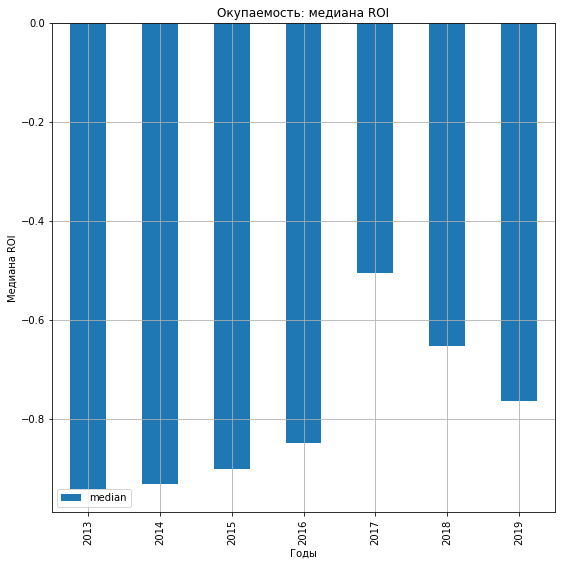

In [92]:
grouped_set = supported_films.groupby('show_start_year')['roi'].agg(
    ['median', lambda x: '{:.2} '.format(x.mean())])
grouped_set = grouped_set.rename(columns={'<lambda_0>': 'mean'})
print(grouped_set)

ax = grouped_set.plot(kind='bar', y='median', figsize=(9, 9), grid=True)
ax.set_title('Окупаемость: медиана ROI')
ax.set_xlabel('Годы')
ax.set_ylabel('Медиана ROI')

Text(0, 0.5, 'Среднее ROI')

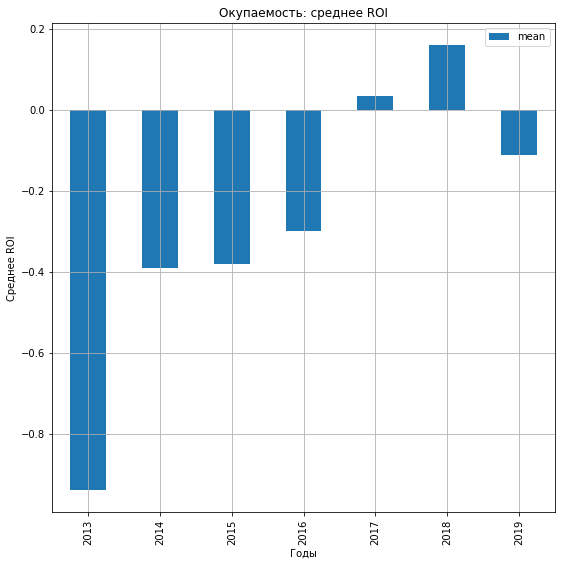

In [93]:
ax = grouped_set.plot(kind='bar', y='mean', figsize=(9, 9), grid=True)
ax.set_title('Окупаемость: среднее ROI')
ax.set_xlabel('Годы')
ax.set_ylabel('Среднее ROI')

                         median            mean               sum
show_start_year                                                  
2013            -117,556,502.45 -120,000,000.00   -235,113,004.90
2014             -38,122,768.00  -18,000,000.00   -285,062,616.40
2015             -38,805,656.00  -22,000,000.00 -1,911,384,804.86
2016             -52,008,798.00  -24,000,000.00 -1,454,528,828.90
2017             -33,222,277.00  100,000,000.00  3,913,502,732.96
2018             -37,594,026.25   52,000,000.00  2,933,404,911.25
2019             -45,741,616.00  -14,000,000.00   -853,969,193.96


Text(0, 0.5, 'Суммарная прибыль')

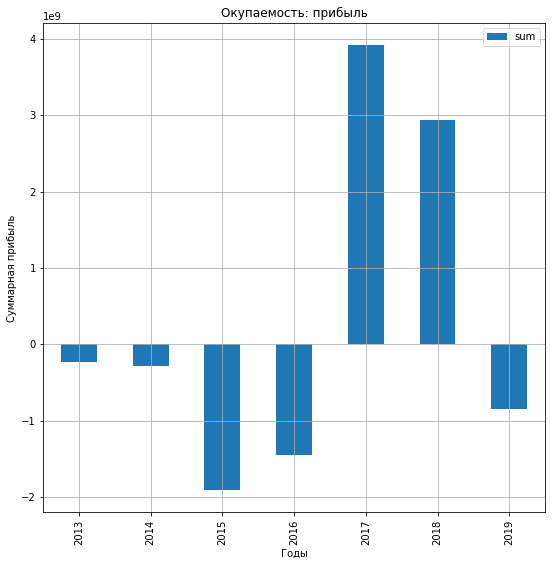

In [94]:
grouped_set_2 = supported_films.groupby('show_start_year')['profit'].agg(['median', lambda x: '{:.2} '.format(x.mean()), 'sum'])
grouped_set_2 = grouped_set_2.rename(columns={'<lambda_0>': 'mean'})
print(grouped_set_2)

ax = grouped_set_2.plot(kind='bar', y='sum', figsize=(9, 9), grid=True)
ax.set_title('Окупаемость: прибыль')
ax.set_xlabel('Годы')
ax.set_ylabel('Суммарная прибыль')

Фильмы с самой высокой окупаемостью:

In [95]:
supported_films.query('show_start_year in [2017, 2018]').sort_values(by='roi', ascending=False).loc[:, ['title', 'age_restriction', 'roi']].head()

,title,age_restriction,roi
5708,лёд,«12+» - для детей старше 12 лет,8.73
5749,я худею,«16+» - для детей старше 16 лет,6.23
5641,ёлки новые,«6+» - для детей старше 6 лет,3.91
6178,непрощенный,«16+» - для детей старше 16 лет,3.77
5653,движение вверх,«6+» - для детей старше 6 лет,3.71


In [96]:
# Код ревьюера
supported_films[supported_films['title'].str.contains('олоп')]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,show_start_year,main_director,main_genre,support_share,total_support,profit,roi
7456,холоп,111021719,2019-12-19 12:00:00+00:00,художественный,"ооо ""мем-медиа"" по заказу ао ""вбд груп""",россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00",...,6.80,комедия,"3,073,568,690.79",2019,К.Шипенко,комедия,0.38,"60,000,000.00","2,913,568,690.79",18.21


В целом инвестиции Минкульта в развитие кинематографа окупились и принесли прибыль:

In [97]:
# за все время
print(supported_films['box_office'].sum() - supported_films['total_support'].sum())
# в 2013 году
print(supported_films[supported_films['show_start_year'] == 2013]['box_office'].sum() - 
      supported_films[supported_films['show_start_year'] == 2013]['total_support'].sum())

22738744203.190002
-114025559.9


**Вывод**

Медианная окупаемость (ROI) субсидионных фильмов остается отрицательной. Убыточность по медиане снижалась до 2017 года включительно, этот год был самым успешным, если судить по медиане. Затем в 2018-2019 годах медианная ROI снова снижается.

Однако, если судить по среднему ROI, то картина выглядит иначе. Убыточность по среднему стабильно снижается до 2018 года включительно, в 2017 и 2018 году среднее уже положительно. При условии увеличения убыточности (роста по модулю отрицательной медианы) в 2018 году, нужно предположить, что в этом году было несколько очень удачных на общем фоне проектов, которые позволили вывести среднее в плюс и даже повысить его по сравнению с предыдущим годом. Это были фильмы "Лёд", "Я худею", "Ёлки новые", "Непрощенный" и "Движение вверх" для детской и подростковой аудитории.

2019 год стал менее удачным: медианное ROI ушло еще глубже в минус, среднее - тоже ушло в минус.

График суммарной прибыльности дотационных фильмов в общем повторяет динамику среднего значения ROI. Можно сказать, что на фоне кратного роста инвестиций в 2015 - 2016 годах, были получены значительные убытки. В 2017-2018 годах в целом субсидии кинематографа вышли в значительный плюс и перекрыли убытки прошлых лет, а в 2019 на фоне роста суммарных инвестиций и медианной инвестиции на один фильм, прибыль снова ушла в минус. 

В целом 2017 год был наиболее успешным с точки зрения окупаемости инвестиций в кинематограф. 

#### Рейтинг фильмов, субсидированных государством

Ответим на вопрос о том, насколько субсидированные фильмы интересны зрителю. Для этого сравним основные метрики по рейтингу фильмов, субсидированных государством, и фильмов, снятых без господдержки.

In [98]:
supported_films['ratings'].describe()

count   317.00
mean      6.04
std       1.14
min       1.00
25%       5.40
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

In [99]:
data.query('refundable_support.isna() == True and nonrefundable_support.isna() == True')['ratings'].describe()

count   7,154.00
mean        6.52
std         1.08
min         1.10
25%         6.00
50%         6.60
75%         7.20
max         9.90
Name: ratings, dtype: float64

**Вывод**

Субсидированные государством фильмы в среднем имеют более низкий рейтинг, чем фильмы, снятые без участия государства (медианное значение рейтинга 6.2 против 6.6, среднее 6.04 против 6.52). Однако эти различия нельзя назвать существенными. Учитывая, что речь идет об искусстве, можно предположить, что без участия Минкульта РФ кем-то были сняты шедевры, которые и сдвинули среднее значение.

### Шаг 5. Общий вывод

### Описание проекта

Проект представляет собой исследование российского рынка проката фильмов. Заказчик — Министерство культуры Российской Федерации.

Поставленная задача - изучить рынок российского кинопроката и выявить текущие тренды. В рамках исследования нужно рассмотреть все фильмы, вышедшие в кинопрокат, а также исследовать фильмы, получившие государственную поддержку.

Источник информации - данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Данные предоставлены за 2010 - 2019 годы.

### Подготовка данных к анализу
Исходный набор данных был представлен в двух таблицах, которые были объединены. Получившийся датасет содержал 4687 строк, 16 колонок. Данные содержали пропуски, ошибочные значения, выбросы. В ходе предобработки данные были проверены на возможные ошибки и дубликаты, выбросы устранены, пропуски в данных заполнены там, где это было возможно. Были добавлены технические столбцы для удобства работы. В получившемся рабочем датасете `data` содержится 7485 строк, 20 колонок. Исследование проведено на его основании.

### Анализ фильмов в российском кинопрокате
#### Динамика количества фильмов в прокате
За период с 2010 по 2019 год в российский прокат вышел 6761 фильм.

В 2010 году в прокат вышло 818 фильмов. В 2011 - 2017 годы количество упало, минимум был в 2017 году (505 фильмов, и это особенно интересно, учитывая, что 2017 год показал высокие суммарные кассовые сборы - чуть меньше, чем в наиболее успешном 2018 году - и максимальные медианные сборы с одного фильма). В 2018 году число фильмов в прокате (883 фильма), впервые превысило значение 2010 года. Рост продолжился в 2019 году, когда вышел максимум фильмов (924 фильма).

В целом, динамику можно охарактеризовать так: локальный максимум в 2010, резкий обвал в 2011 году (557 фильмов), дальше постепенный рост до 2019 года с провалом на 2017 году. Можно ожидать, что количество фильмов в прокате и дальше будет расти.

#### Динамика кассовых сборов
Суммарные кассовые сборы показывают общую тенденцию к росту. Скачкообразный рост отмечен в 2014 году. Причина неочевидна.

Количество фильмов, для которых известны кассовые сборы, растет с 2010 года. К 2014 году это значение выросло примерно в 2.7 раз по сравнению с 2010 годом, а кассовые сборы выросли в 3065.5 раз. Начиная с 2015 значительно больше фильмов с указанной информацией о кассовых сборах (данных за 2015 год примерно в два раза больше, чем за 2013), но это не объясняет роста сборов на несколько порядков. Также могли сказаться выросшие сборы с одного фильма. 

Возможная причина роста - нулевая начальная база, возможно, повышение уровня жизни, возможно, сказалось что-то еще. Во всяком случае, это не связано с ростом среднего и медианного рейтинга фильмов, вышедших в прокат.

Одновременно с суммарными сборами в 2014 году на несколько порядков выросли медианное и среднее значения кассовых сборов. Для медианы резкий рост (на два порядка) продолжился в 2015 году.

В 2017 году вырос медианный сбор с одного фильма по всем возрастным категориям. За счет этого суммарные сборы были почти такими же, как в 2018 году, несмотря на то, что фильмов в прокат вышло значительно (на 42%) меньше. Этот год был наиболее успешным.

#### Влияние возрастных ограничений фильмов на кассовые сборы
Фильмы в российском прокате разделены по возрастным категориям: "0+", "6+", "12+", "16+", "18+", которые влияют на кассовые сборы.

Больше всего в российском прокате фильмов категории "16+" (2851 прокатное удостоверение за 10 лет). Меньше всего детских фильмов "0+" и "6+", их суммарное количество (881 и 625 прокатных удостоверений) меньше, чем в любой другой категории. При этом медианные сборы с фильмов "6+" выше, чем в любой другой категории. Вторая по медианным сборам категория - "18+".

Суммарные сборы максимальны по категории "16+" (76_583_674_041 рублей), что обусловлено количеством фильмов в прокате. Следом за ней идет категория "12+". Для сравнения, сборы по категории "6+" (57_197_131_795 рублей) составляют 3/4 этой суммы. Минимальны суммарные сборы по категории "0+" - возможно, дети, которым эти фильмы или мультфильмы интересны, в кинотеатры не попадают (медианные сборы по этой категории также минимальны).

Анализ динамики за 2015 - 2019 годы показывает следующее. В 2017 году был максимальный медианный сбор с одного фильма по всем категориям (кроме "12+", но и для нее это локальный пик). Вероятно, это связано с выходом хороших фильмов. В категории "0+" и "6+" - вероятно, это фильмы "Движение вверх", "Ёлки новые". Мультфильмы: , "Гадкий я", "Босс-молокосос", "Монстры на каникулах", "Гринч", "Зверопой", "Три богатыря и принцесса Египта", "Фиксики", "Тачки-3", "Ральф против интернета", "Суперсемейка-2".

Самый высокий показатель медианных сборов в группе "12+" приходится на 2015 год. Это вышли "Звездные войны: пробуждение силы".

Самые высокие кассовые сборы в российском кинопрокате показал фильм "Холоп" (2019, Россия). Фильм был субсидирован Минкультом.

В целом, в российском прокате лучше всего окупаются фильмы категории "6+". Макимальные суммарные кассовые сборы в категориях "12+" и "16+". Предположительно, причина в том, что в кино наиболее охотно ходят дети и подростки.

### Анализ фильмов, получивших субсидии
#### Распределение субсидий

Минкульт субсидирует фильмы российского или, реже, совместного производства.

В основном поддержку получают фильмы для подростков: категории "12+" и "16+", на них в совокупности приходится около 2/3 выданных субсидий. Порядка 20% составляют фильмы категории "6+". Сравнительно высокая доля субсидий на фильмы "6+", возможно, связана со стремлением развить кино для младшешкольников: таких фильмов в российском прокате явно не хватает.

Чаще других субсидии получают драмы, комедии и мультфильмы. 

Самым популярным жанром оказались подростковые драмы (68 фильмов из 317 с рейтингами "12+" и "16+"). На втором месте - подростковые комедии (62 фильма из 317 с рейтингами "12+" и "16+"). На третьем месте идут мультфильмы с рейтингом "6+" (26 фильмов).

В наиболее популярной категории подростковой драмы много патриотических, военных и исторических фильмов ("Т-34", "А зори здесь тихие...", "Тренер", "Крым", "Донбасс. Окраина", "Батальонъ"). Однако топ по бюджетам в этой категории - фильм "Грех" (про Микеланджело) и "Дуэлянт" (приключенческий фильм про русское дворянство и дуэли).

Минкульт поддерживает разнообразие киностудий, субсидии получают не только топовые, но и малоизвестные студии. Чаще других субсидии получают студии ООО "Таббак", ООО "Студия анимационного кино "Мельница", ООО "Кинокомпания "СТВ", ООО "Визарт фильм", ООО "Продюсерский центр "Ленфильм", ООО "Каро продакшн", ООО "Артлайт", ООО "Энджой мувиз", ООО "Нон-стоп продакшн" и ООО "Магнум-фильм".

317 субсидий были выданы на фильмы 259 режиссеров. Максимальное количество субсидий, полученных одним режиссером - пять штук, их получил Р.Давлетьяров. Чаще других субсидии получают Д. Дьяченко, С.Андреасян, А.Цицилин, А.Котт, Д.Шмидт, Н.Хомерики, С.Мокрицкий, К.Шипенко, А.Аксененко. Можно сказать, что Минкульт имеет целью разнообразие кинопродукции.

Субсидированные государством фильмы в среднем имеют более низкий рейтинг, чем фильмы, снятые без участия государства (медианное значение рейтинга 6.2 против 6.6, среднее 6.04 против 6.52). Однако эти различия нельзя назвать существенными. Учитывая, что речь идет об искусстве, можно предположить, что без участия Минкульта РФ кем-то были сняты шедевры, которые и сдвинули среднее значение.

#### Динамика объемов субсидий

Данных по объему государственных субсидий до 2013 года нет. В 2013 году количество фильмов, получивших субсидии, было минимальным, при этом медиана субсидии на фильм максимально высокая. 

Можно предположить, что в 2013 году субсидии были экспериментом, причем удачным: было субсидировано всего два фильма, но на очень крупные суммы. Субсидии не окупились, однако курс на субсидирование российского кинематографа был продолжен. С 2013 года динамика господдержки (объемы, количество фильмов, медиана субсидии) имеет общую тенденцию к росту, несмотря на неравномерность показателей. Графики выглядят так, будто Минкульт ищет оптимальную стратегию субсидирования кинематографа и имеет намерение поддерживать российскую кинопродукцию и дальше.

В 2014 году медиана субсидий падает, после этого равномерно растет вплоть до 2019 года включительно. В 2014 году количество фильмов, получивших субсидию, растет, в 2015 достигает пика на фоне сравнительно низкой единичной субсидии (которая все же выше, чем в 2014 году). В 2016 году количество фильмов несколько снижается, зато медиана увеличивается и общая сумма субсидий достигает пика. В 2017 году поддержка временно сокращается: при растущей медиане падает количество фильмов и общий объем субсидий. После этого, начиная с 2017 и в 2018 - 2019 году, все показатели равномерно растут.

Медианная доля субсидий в бюджете фильмов колеблется в пределах 47 - 64%. Самой низкой после "пробного" 2013 года она была в наиболее удачном с точки зрения кассовых сборов 2017 году.

#### Окупаемость субсидий

Инвестиции Минкульта в кинематограф за восемь лет в целом окупились и принесли прибыль 22_738_744_203 рублей. 

При этом большинство субсидированных фильмов убыточны. Медианная окупаемость (ROI) субсидионных фильмов отрицательная. Убыточность по медиане снижалась до 2017 года включительно, этот год был самым успешным по этому показателю. Затем в 2018-2019 годах медианная ROI снова снижается.

Однако, если судить по среднему ROI, то картина выглядит иначе. Убыточность по среднему стабильно снижается до 2018 года включительно, в 2017 и 2018 году среднее уже положительно. При условии увеличения медианной убыточности (роста по модулю отрицательной медианы) в 2018 году, нужно предположить, что в этом году было несколько очень удачных на общем фоне проектов, которые позволили вывести среднее в плюс и даже повысить его по сравнению с предыдущим годом. Это были фильмы "Лёд", "Я худею", "Ёлки новые", "Непрощенный" и "Движение вверх" для детской и подростковой аудитории.

Последний 2019 год был менее удачным: медианное ROI ушло еще глубже в минус, среднее - тоже ушло в минус.

График суммарной прибыльности дотационных фильмов в общем повторяет динамику среднего значения ROI. На фоне кратного роста инвестиций в 2015 - 2016 годах, были получены значительные убытки. В 2017-2018 годах сборы выросли, прибыль вышла в значительный плюс и перекрыла убытки прошлых лет. В 2019 на фоне роста суммарных инвестиций и медианной инвестиции на один фильм, прибыль снова ушла в минус.

В целом 2017 год был наиболее успешным с точки зрения окупаемости инвестиций в кинематограф. 

Можно надеяться, что в дальнейшем Минкульт выйдет в уверенных плюс по возврату инвестиций. Курс на поддержку российского кино, вероятнее всего, продолжится. 

